# Simulation of a discrete Markov chain

### Import libraries

In [69]:
import matplotlib.pyplot as plt
import networkx as nx
from random import choices
from collections import Counter

### Definition of the Markov chain transition matrix

In [1]:
p=[
    [0.396, 0.312, 0.2, 0.092],
    [0.242, 0.179, 0.267, 0.312],
    [0.811, 0.108, 0.006, 0.075],
    [0.088, 0.458, 0.318, 0.136]
]

In [46]:
for row in p:
    if round(sum(row),5) != 1:
        print("Row sum has to br 1 but is",round(sum(row),5))

### Draw Markov chain

In [32]:
dg = nx.DiGraph()
dg.add_nodes_from(range(1,len(p)+1))

edges=[]
edge_labels={}
for i in range(len(p)):
    for j in range(len(p)):
        if p[i][j]>0:
            edge=(i+1,j+1)
            edges.append(edge)
            edge_labels[edge]=str(round(p[i][j]*100))+"%"

dg.add_edges_from(edges)

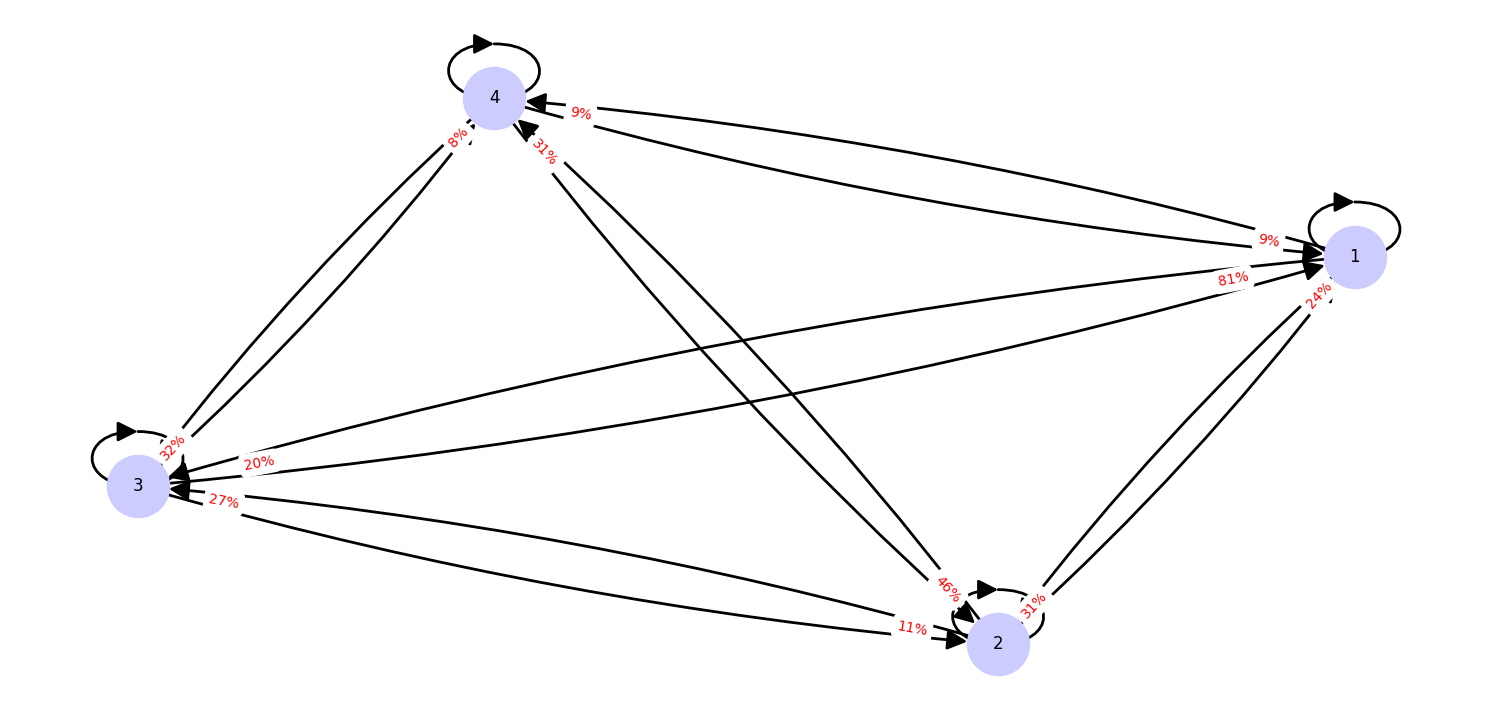

In [41]:
fig, ax = plt.subplots(figsize=(19, 9))
pos = nx.spring_layout(dg)
nx.draw(dg, pos, ax=ax, with_labels=True, node_color='#CCCCFF', node_size=2000, arrowsize=30, width=2, connectionstyle='arc3, rad = 0.05')
nx.draw_networkx_edge_labels(dg, pos, ax=ax, edge_labels=edge_labels, font_color='red', label_pos=0.1)
plt.show()

### Simulation

In [47]:
start_state = 2
steps = 100

In [66]:
states=[start_state]
for i in range(steps-1):
    row=p[states[-1]-1]
    states.append(choices(list(range(len(row))),weights=row)[0]+1)

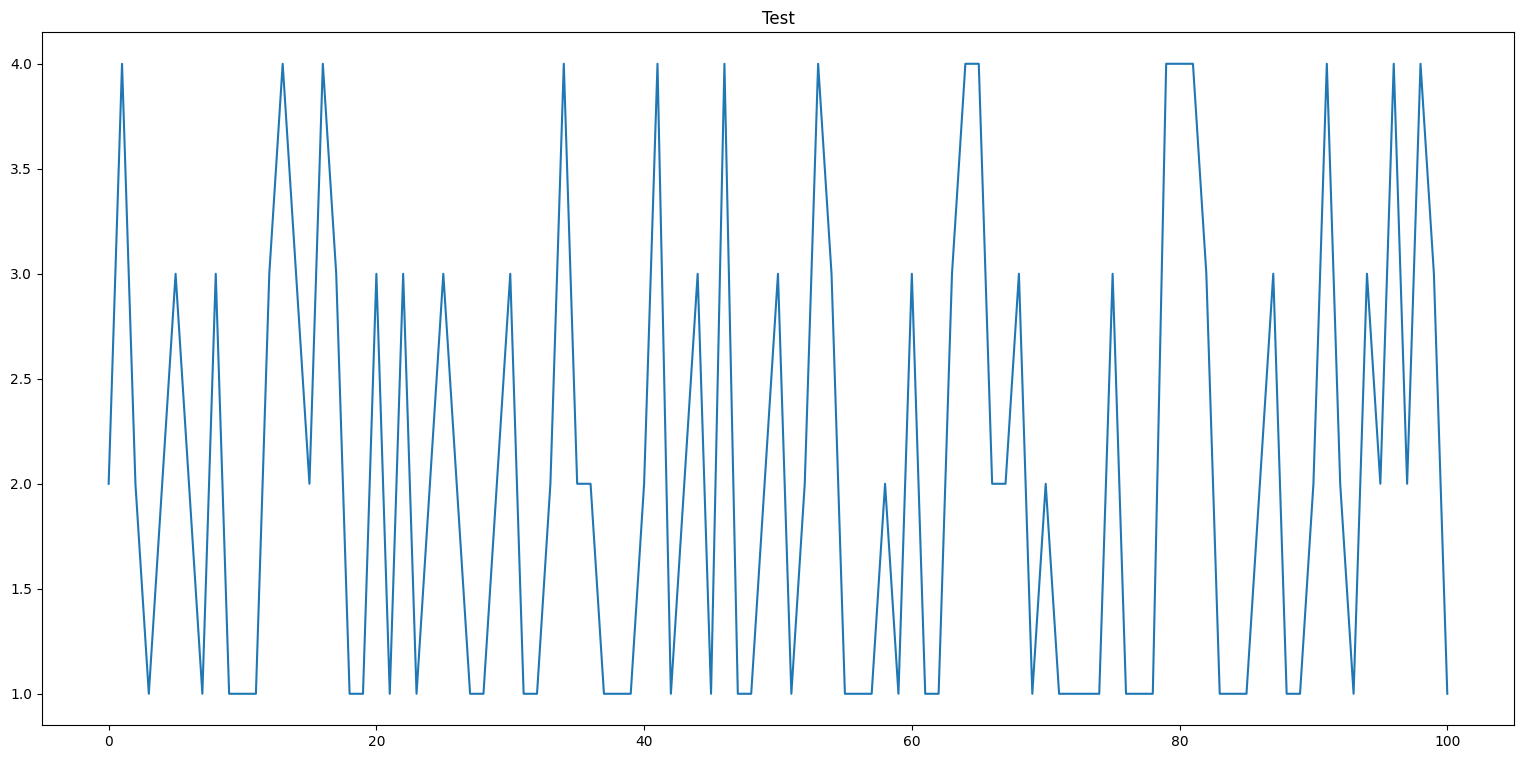

In [75]:
fig, ax = plt.subplots(figsize=(19, 9))
plt.title("State as a function of time")
ax.plot(states)

<BarContainer object of 4 artists>

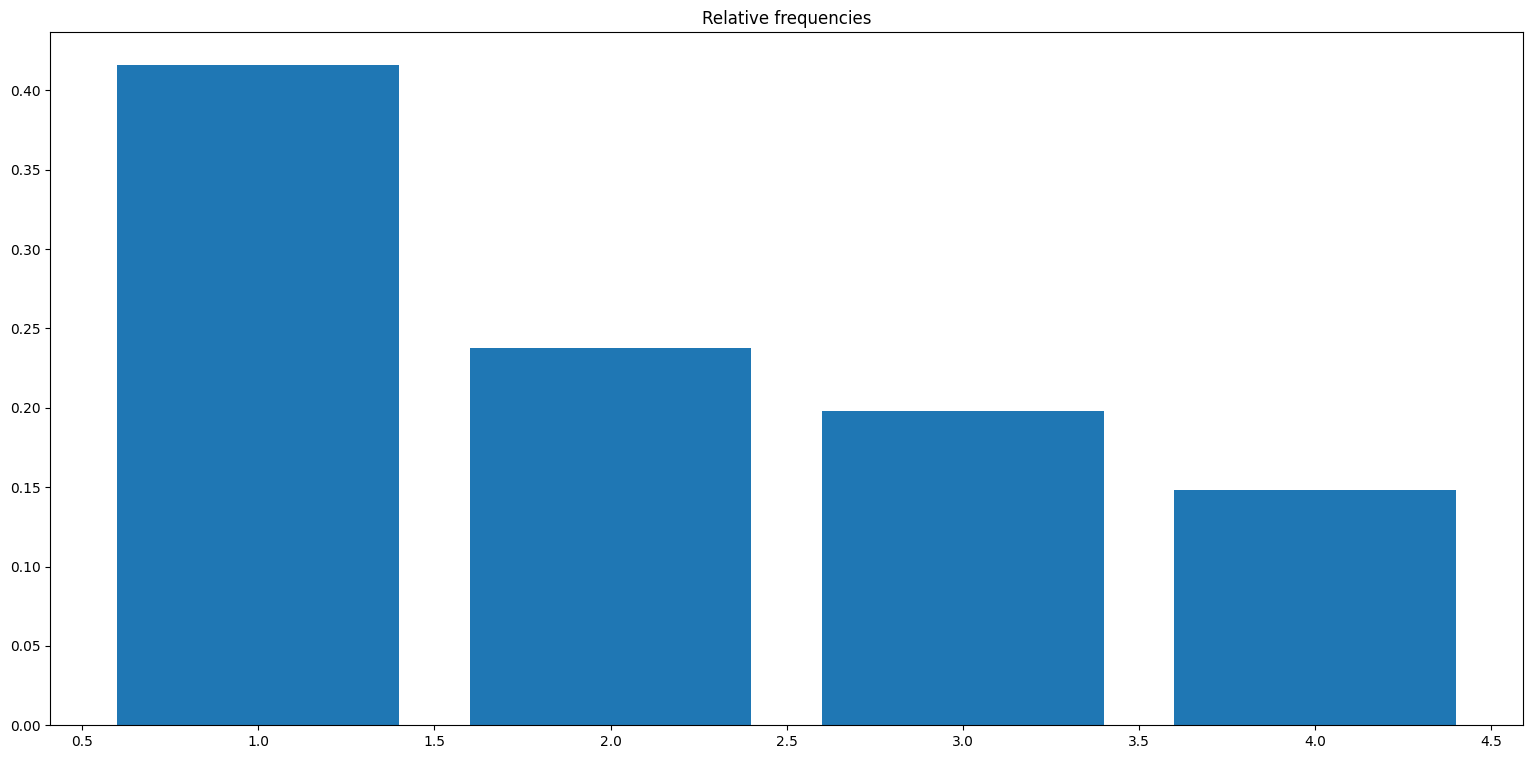

In [79]:
labels, values = zip(*Counter(states).items())
values=[value/sum(values) for value in values]
fig, ax = plt.subplots(figsize=(19, 9))
plt.title("Relative frequencies")
ax.bar(labels, values)